In [155]:
import numpy as np

# 'x' should be dotted with theta
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(expect, output):
    error = expect - output
    return np.sum(error*error)/2

def cost_derivative(expect, output):
    return output-expect

def deriv_z(z):
    return z*(1-z)

def sigmoid_prime(x):
    return deriv_z(sigmoid(x))

In [156]:
# create training data
input = np.array([[0, 0, 1],
                 [0, 1, 0],
                 [0, 1, 1],
                 [1, 0, 0],
                 [1, 0, 1]])

# create the label related with the input training data
output = np.array([[0],
                  [1],
                  [0],
                  [1],
                  [1]])

# network design:
# input(layer_1): 3 nodes
#    weights: 3x4 matrix
# layer_2: 4 nodes
#    weights: 4x1 matrix
# output: 1 node
weight_layer_1 = np.random.rand(3, 4)
weight_layer_2 = np.random.rand(4, 1)

print "Init weight1:"
print weight_layer_1

print "Init weight2:"
print weight_layer_2


Init weight1:
[[ 0.59456029  0.47075843  0.66510925  0.75135713]
 [ 0.61555251  0.43763178  0.46919414  0.477619  ]
 [ 0.29740538  0.13567938  0.28012725  0.75077295]]
Init weight2:
[[ 0.14908379]
 [ 0.02082039]
 [ 0.4847758 ]
 [ 0.31539323]]


# 神经网络

定义第$l^{th}$层第$j^{th}$个神经元的输入：$z_j^{(l)}=\sum_{k=1}^n w_{jk}^{(l-1)} a_k^{(l-1)} + b_j^{(l)}$

该神经元的输出：$a=f(z)=sigmoid(z)$

注，第一层神经元的输入就是采样数据，不需要计算z值，这层采样数据直接通过权重计算输入到第二层的神经元。

# 反向传播算法

## 代价函数
定义代价函数：$cost = {1 \over 2} \sum (y^{(i)} - a^{(i)})^2$

## 神经元错误量 $\delta_j^{(l)}$

每个神经元的输入记为'z'，经过激活函数'f(z)'生成激活值'a'，通常情况下激活函数使用sigmoid()。那么假设对于每个神经元的输入'z'做一点微小的改变记为 $\Delta z$，由这个改变引起的代价变化记为这个神经元的错误量$\delta_j^{(l)}$，从这个定义可以看出来这是一个代价函数相对于神经元的输入'z'的偏导数。

定义 $\delta_j^{(l)}$ 为 $l^th$层中的第$j^th$个神经元的错误量，记作：$\delta_j^{(l)} =\frac{\partial C}{\partial z_j^{(l)}}$

经过数学推导可以得出结论：

* 最后一层（L层）第j个神经元的错误量：

$\delta_j^{(L)} = \frac{\partial C}{\partial z_j^{(l)}}$ = $\frac{\partial C}{\partial a_j^{(L)}}$ $\frac{\partial a_j^{(L)}}{\partial z_j^{(L)}}$ = $-(y-a_j^{(L)}) \bigodot [a_j^{(L)}(1-a_j^{(L)})] $

y：采样的结果

$a_j^{(L)}$：样本输入计算的结果

* 其余各层(l层)第j个神经元的错误量：

$\delta_j^{(l)} =\frac{\partial C}{\partial z_j^{(l)}}$ = $(\sum \delta_j^{(l+1)} \cdot w_{ij}^{(l)}) \bigodot [a_j^{(l)}(1-a_j^{(l)})]$

因为首先可以算出来每一层的激活量$a_j^{(l)}$，那么可以看出来除了最后一层外的其他层的错误量可以靠后面一层的错误量计算出来，直至推算到最后一层$\delta_j^{(L)}$。

因此反向传播算法也就是从最后一层往前一层一层计算的过程，与计算激活量的方向正好相反，因此得名反向传播。

## 权重调整$\frac{\partial C}{\partial w_{jk}^{(l)}}$及偏置调整$\frac{\partial C}{\partial b_{j}^{(l)}}$

观察每个神经元的输入$z_j^{(l)}=\sum_{k=1}^n w_{jk}^{(l-1)} a_k^{(l-1)} + b_j^{(l)}$可以发现神经网络计算过程中最重要的是要确定两个量权重w和偏置b。

仿照错误量计算方法将问题进行一下转化，是否可以计算出代价函数相对于权重和偏置的变化速率（偏微分），然后通过乘以一个小数字（学习速率）来一点一点降低代价函数的输出，从而逼近最终需要的权重及偏置值呢？

因此可以将问题转化为求$\frac{\partial C}{\partial w_{jk}^{(l)}}$和$\frac{\partial C}{\partial b_j^{(l)}}$

通过推导可以得出：

$\frac{\partial C}{\partial w_{jk}^{(l)}} = \delta_j^{(l+1)} a_k^{(l)}$

$\frac{\partial C}{\partial b_{jk}^{(l)}} = \delta_j^{(l)}$

基于前面对于错误量$\delta_j^{(l)}$就可以非常简单的得到相应的结果。

那么最终对于权重及偏置的调整可以这样做：

$w_{new}=w - \eta \frac{\partial C}{\partial w_{jk}^{(l)}}$

$b_{new}=b - \eta \frac{\partial C}{\partial b_{jk}^{(l)}}$

其中 $ \eta $是一个非常小的正数，这个数字也被叫做“学习速率”，通过这个值的调整可以控制拟合的速度。


In [157]:
# learning rate
eta = 0.1

loop = 0

x=[]
y=[]
while loop < 50000:
    # feed forward
    z_layer_2 = np.dot(input, weight_layer_1)
    a_layer_2 = sigmoid(z_layer_2)

    z_layer_3 = np.dot(a_layer_2, weight_layer_2)
    a_layer_3 = sigmoid(z_layer_3)
    
    #print "Z2:", z_layer_2
    #print "A2:", a_layer_2

    #print "Z3:", z_layer_3
    # a_layer_2 is the output
    #print "A3:", a_layer_3

    if loop % 100 == 0:
        # cost
        c = cost(output, a_layer_3)
        #print "[%d] Cost: %f" % (loop, c)
        #print "Perception: ", a_layer_3
        x.append(loop)
        y.append(c)
    loop += 1

    # calculate delta_3
    delta_layer_3 = cost_derivative(output, a_layer_3)*deriv_z(a_layer_3)
    #print "Delta3:", delta_layer_3

    # calculate new weight layer 2
    # input matrix: 5x1, 5x4
    # output matrix: 4x1 = 4x5, 5x1
    weight_layer_2 -= eta*np.dot(a_layer_2.T, delta_layer_3)
    #print "New weight2:", weight_layer_2

    # calculate delta_2
    delta_layer_2 = np.dot(delta_layer_3, weight_layer_2.T)*deriv_z(a_layer_2)
    #print "Delta2:", delta_layer_2

    # since layer1 is the input layer, there is NO delta_layer_1

    # calculate new weight layer 1
    # input matrix: 5x3, 5x4
    # output matrix: 3x4 = 3x5, 5x4
    weight_layer_1 -= eta*np.dot(input.T, delta_layer_2)
    #print "New weight1:", weight_layer_1


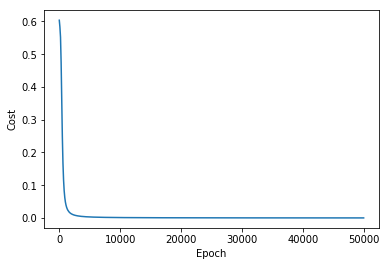

In [158]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()